### Methods & Results

#### 1. Import the packages using `library()`

In [1]:
library(tidyverse)
library(tidymodels)

show_digit = function(arr784, col = gray(12:1 / 12), ...) {
  arr784$X <- 0
  image(matrix(as.matrix(arr784[-785]), nrow = 28)[, 28:1], col = col, ...)
}

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.0 ──

✔ broom        1.0.4     ✔ rsample      1.1.1
✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.0     ✔ yardstick    1.2.0
✔ recipes      1.0.6     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### 2. loads data from the original source on the web 

In [2]:
url <- "https://raw.githubusercontent.com/AllenCheng5186/DSCI100-Proj-Group50-23s1/main/data2/chr_data_set_26000.csv"

chr_data_set <- read_csv(url)

head(chr_data_set)

Rows: 26000 Columns: 785
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (785): label, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


label,1,2,3,4,5,6,7,8,9,⋯,775,776,777,778,779,780,781,782,783,784
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


#### 3. wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis

In [3]:
# define a alphabet that contains English letter from a to z
alphabet <- c("a", "b", "c", "d", "e", "f", "g", "h", "i", 
                                 "j", "k", "l", "m", "n", "o", "p", "q", "r", 
                                 "s", "t", "u", "v", "w", "x", "y", "z")

chr_tidy_data <- chr_data_set |>
    mutate(label = as.factor(label)) # factor the column of label

levels(chr_tidy_data$label) <- alphabet # change the levels of factor to readable alphabet

head(chr_tidy_data) 

label,1,2,3,4,5,6,7,8,9,⋯,775,776,777,778,779,780,781,782,783,784
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
# extract half amount of observations to training different KNN models
chr_data_set_13000 <- chr_tidy_data |>
    group_by(label) |>
    do(head(., n = 500))

nrow(chr_data_set_13000)
head(chr_data_set_13000)
write_csv(chr_data_set_13000, "data2/chr_data_set_13000.csv")

[1] 13000

label,1,2,3,4,5,6,7,8,9,⋯,775,776,777,778,779,780,781,782,783,784
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [5]:
# extract 1/10 amount of observations to tune K value for KNN
chr_data_set_2600 <- chr_tidy_data |>
    group_by(label) |>
    do(head(., n = 100))

nrow(chr_data_set_2600)
head(chr_data_set_2600)
write_csv(chr_data_set_2600, "data2/chr_data_set_2600.csv")

[1] 2600

label,1,2,3,4,5,6,7,8,9,⋯,775,776,777,778,779,780,781,782,783,784
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


#### 4. performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 

In [6]:
# count the number of observations for each letter
each_letter_count <- chr_tidy_data |>
    group_by(label) |>
    summarize(count = n()) |>
    pivot_wider(names_from = label, values_from = count)

each_letter_count

a,b,c,d,e,f,g,h,i,j,⋯,q,r,s,t,u,v,w,x,y,z
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,⋯,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


#### 5. creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis

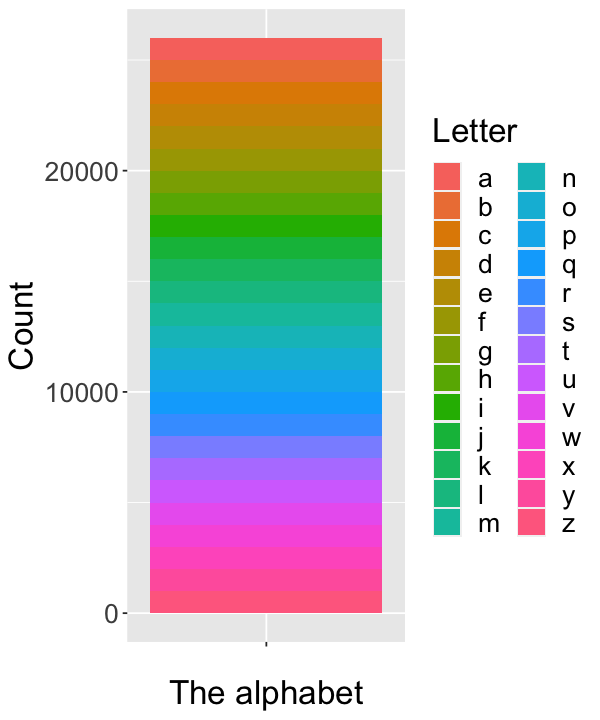

In [7]:
# plot the proportion of amount of each category (letter)
options(repr.plot.width = 5, repr.plot.height = 6)

proportion_label <- each_letter_count |>
    pivot_longer(cols = a:z, names_to = "label", values_to = "count") |>
    ggplot(aes(x="", y = count, fill = label)) +
    geom_bar(width = 1, stat = "identity") +
    labs(x = "The alphabet",
         y = "Count", 
         fill = "Letter") +
    theme(text = element_text(size = 20))

proportion_label

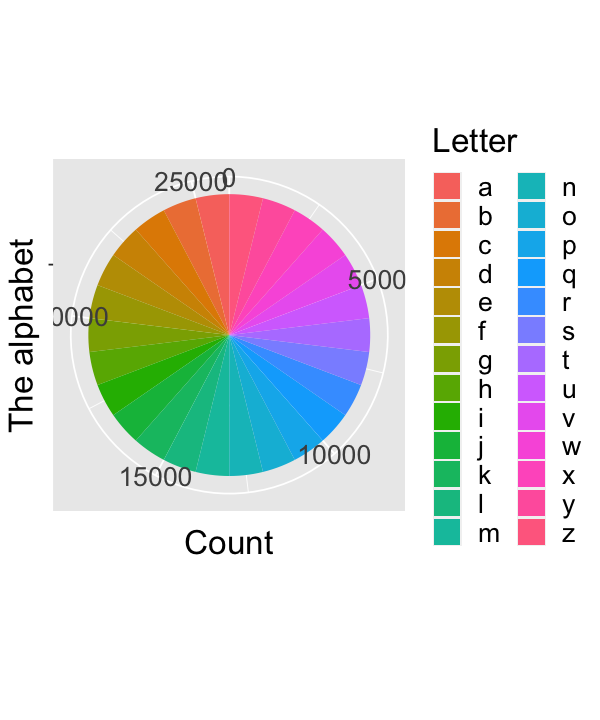

In [8]:
# optional pie plot for proportion
pie <- proportion_label + coord_polar("y", start=0)
pie

# A tibble: 1 × 1
  label
  <fct>
1 a    


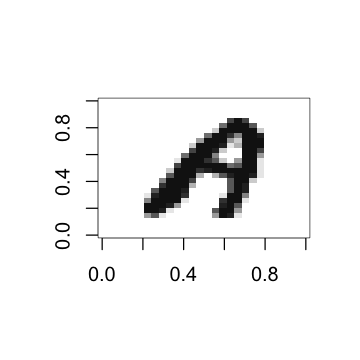

# A tibble: 1 × 1
  label
  <fct>
1 a    


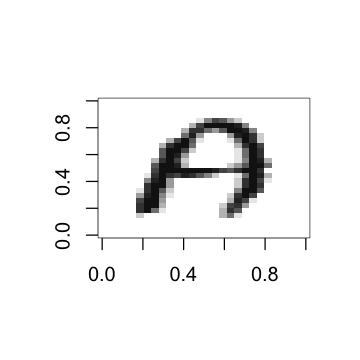

# A tibble: 1 × 1
  label
  <fct>
1 a    


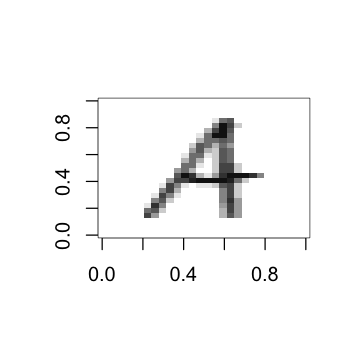

In [9]:
# get the images for the first 3 row from the data set.
options(repr.plot.width = 3, repr.plot.height = 3)

for (i in 1:3){
    show_digit(slice(select(chr_tidy_data, -label), i))
    print(slice(select(chr_tidy_data, label), i))
    }

#### 6. performs the data analysis

##### 6.1 Use the minimum data set of $2600$ rows of observations to tuning the hyber argument $k$ for KNN classification model.

In [10]:
# split the data of 2600 rows into training and testing data sets
chr_initial_2600 <- initial_split(chr_data_set_2600, prop = 0.75, strata = label)
chr_train_2600 <- training(chr_initial_2600)
chr_test_2600 <- testing(chr_initial_2600)

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


In [11]:
# KNN Tuning K
set.seed(2023)

# recipe (scaling and centering are not necessary for this data frame)
chr_knn_recipe <- recipe(label ~ ., data = chr_train_2600)

# models
chr_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# the tibble of K
gridvals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

#cross-validation folds
chr_vfold <- vfold_cv(chr_train_2600, v = 5, strata = label)

# workflow
chr_wf <- workflow() |>
    add_recipe(chr_knn_recipe) |>
    add_model(chr_knn_spec) |>
    tune_grid(resamples = chr_vfold, grid = gridvals)

# result metric
chr_result_2600 <- chr_wf |>
    collect_metrics() |>
    filter(.metric == "accuracy")

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


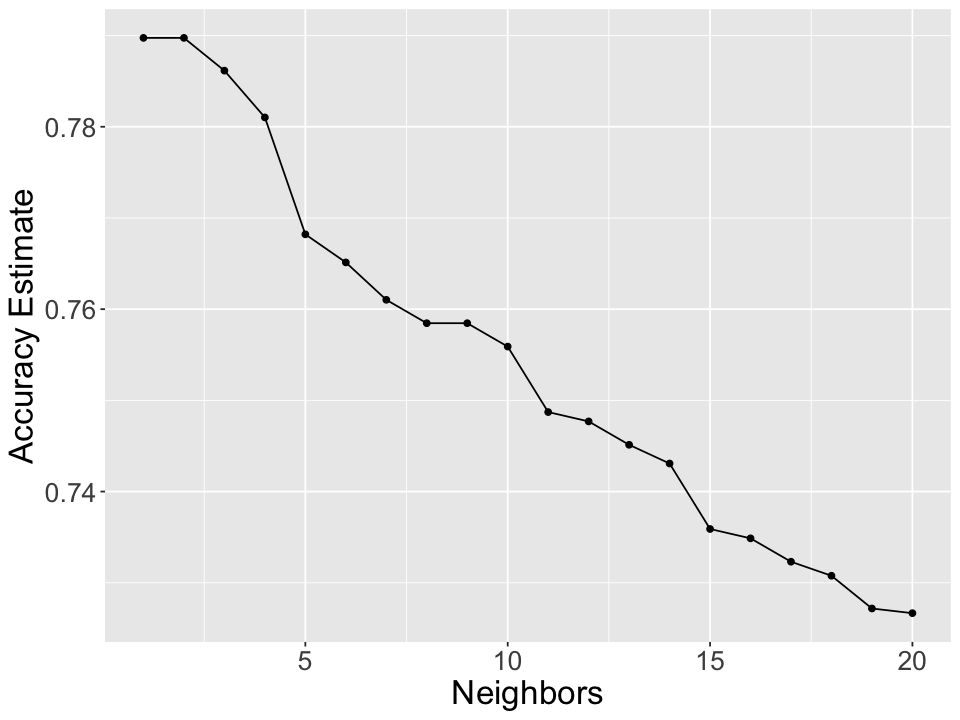

In [12]:
# visualize the change of accuracy on validation data set as change of K
options(repr.plot.width = 8, repr.plot.height = 6)

chr_result_2600_viz <- chr_result_2600 |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))

chr_result_2600_viz

In [13]:
# pull out the best K
best_k <- chr_result_2600 |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)

cat("The best K aftering tuning with cross-validation is", best_k)

The best K aftering tuning with cross-validation is 1

##### 6.2 Use the best $k$ we found to training the KNN classifier based on $2600$ rows of data set and evaluation

In [14]:
# models
set.seed(2023)

chr_knn_best_k_2600_spec <- nearest_neighbor(weight_func = "rectangular",neighbors = best_k)|>
    set_engine("kknn")|>
    set_mode("classification")

# recipe (scaling and centering are not necessary for this data frame)
chr_recipe1 <- recipe(label~.,data = chr_train_2600)

# workflow
chr_wf1 <- workflow()|>
    add_recipe(chr_recipe1)|>
    add_model(chr_knn_best_k_2600_spec) |>
    fit(data = chr_train_2600)


In [15]:
# predict, evaluation
chr_knn_best_k_2600_result <- predict(chr_wf1,chr_test_2600)|>
    bind_cols(chr_test_2600)|>
    metrics(truth = label,estimate = .pred_class)|>
    filter(.metric=="accuracy") |>
    bind_cols(tibble(data_size = 2600, log_reg = "No")) |>
    select(data_size, log_reg, .metric, .estimator, .estimate)

chr_knn_best_k_2600_result 

data_size,log_reg,.metric,.estimator,.estimate
<dbl>,<chr>,<chr>,<chr>,<dbl>
2600,No,accuracy,multiclass,0.7907692


##### 6.3 Build logistic regression model on the entire data set ($26,000$ observations)

In [16]:
nrow(chr_tidy_data)

[1] 26000

In [17]:
# buiding logistic regression model
chr_lrm_26000 <- glm(label ~., data = chr_tidy_data, family = binomial)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


##### 6.4 Use logistic regression predict the probability of $(2600)$ test data set 

In [18]:
# Predict test which is split from 2600 data set using logical regression model
filter_test_2600 <- predict(chr_lrm_26000, chr_test_2600, type = "response")

filter_test_2600_prob <- data.frame(probability = filter_test_2600) |>
                bind_cols(chr_test_2600)

head(filter_test_2600_prob)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


,probability,label,1,2,3,4,5,6,7,8,⋯,775,776,777,778,779,780,781,782,783,784
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.22849172,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0.49896601,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0.19370768,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0.05587633,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0.96200043,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0.15512769,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


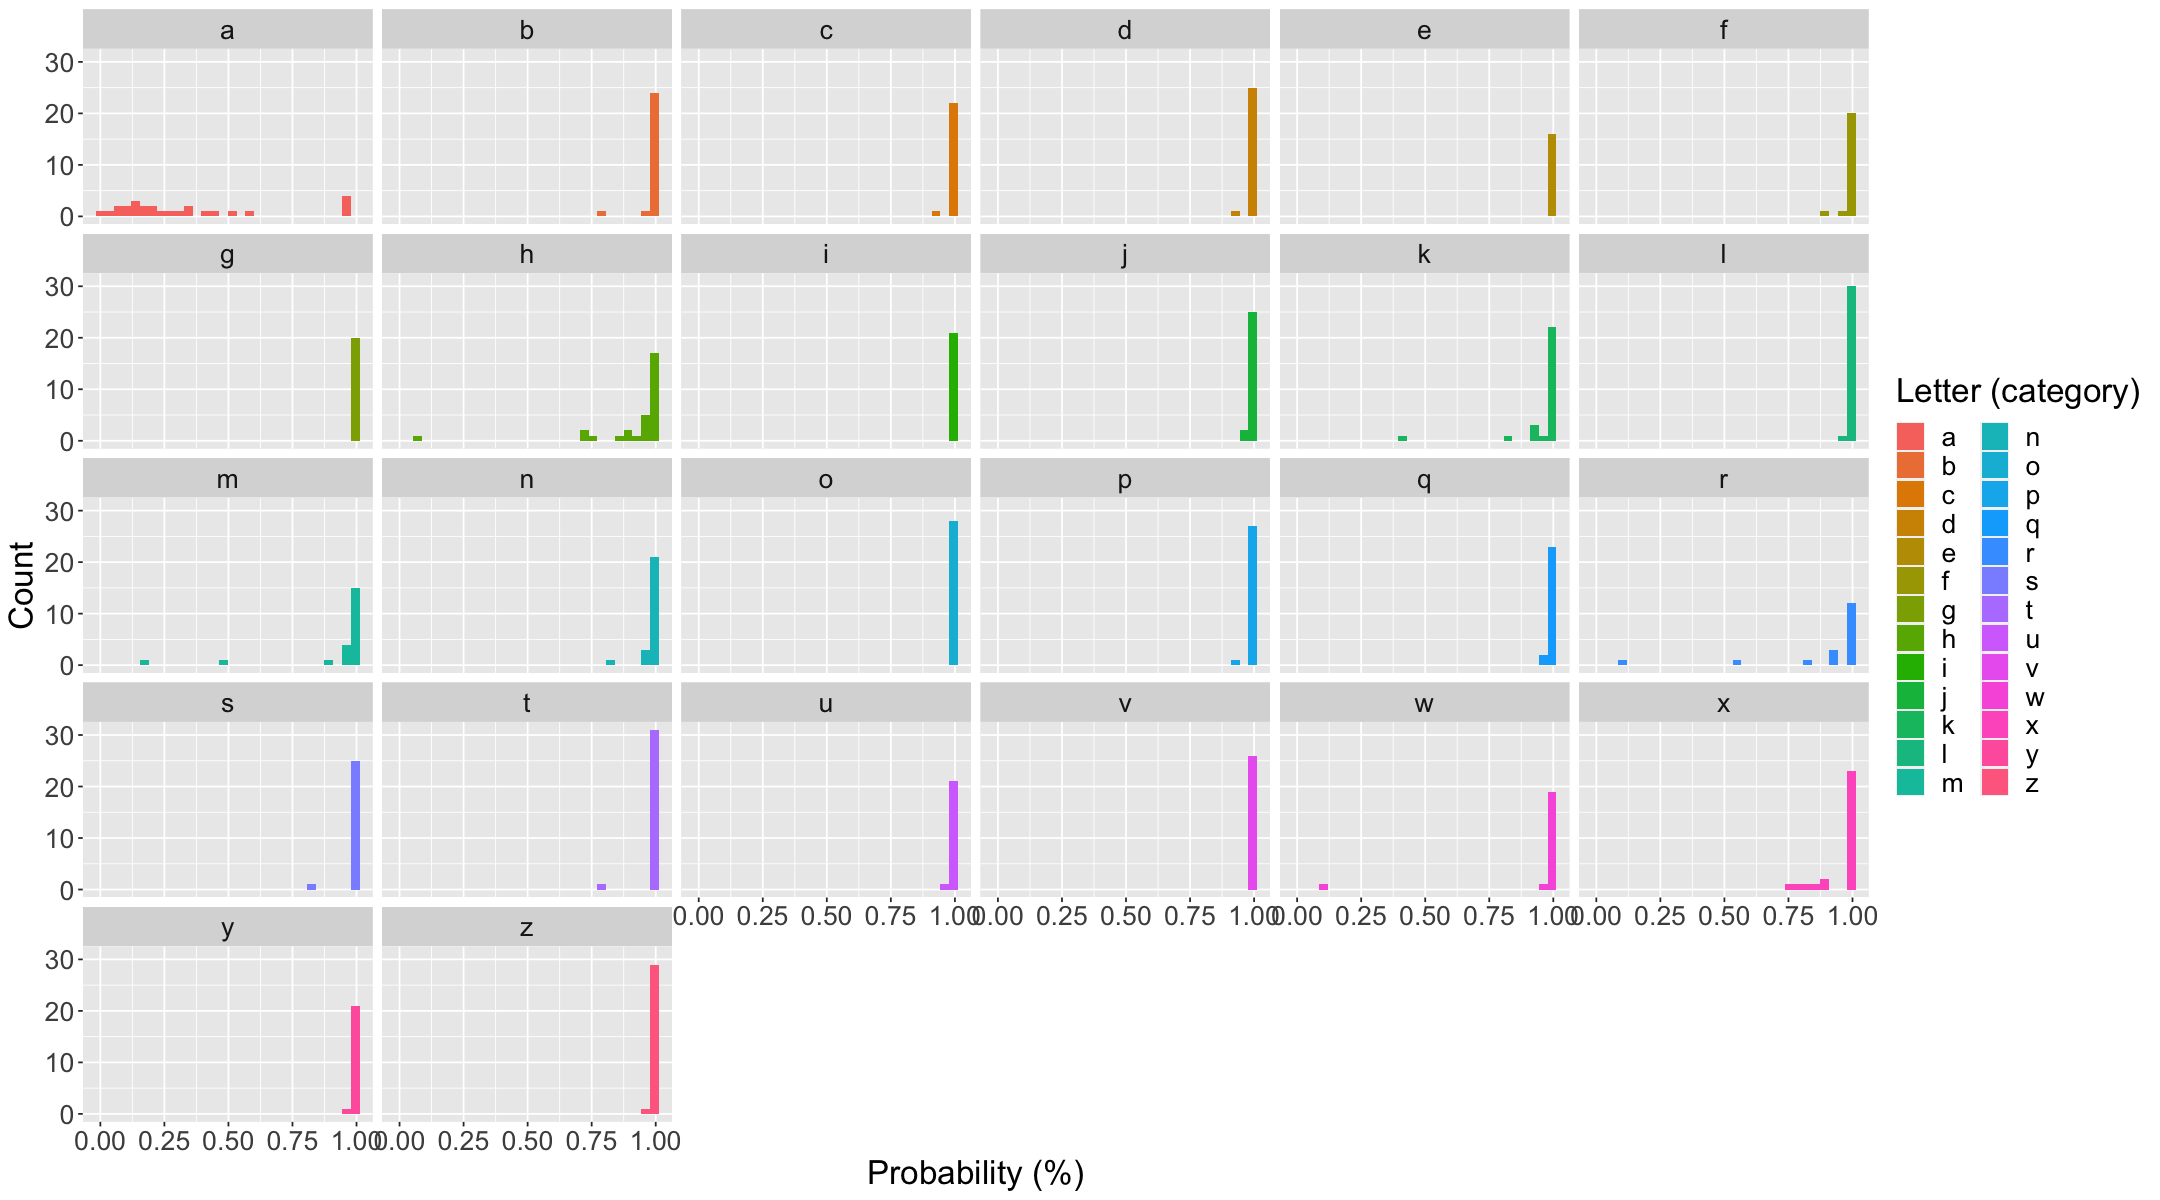

In [19]:
# visualize the count distribution of different probabilities
options(repr.plot.height = 10, repr.plot.width = 18)

filter_test_2600_prob_plot1 <- filter_test_2600_prob |>
    ggplot(aes(x = probability,fill = label)) +
    geom_histogram() +
    facet_wrap(~label) +
    labs(x = "Probability (%)",
         y = "Count",
         fill = "Letter (category)") +
    theme(text = element_text(size = 20))

filter_test_2600_prob_plot1

# A tibble: 1 × 2
  label probability
  <fct>       <dbl>
1 a         0.00496


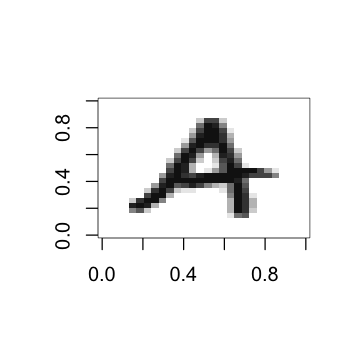

# A tibble: 1 × 2
  label probability
  <fct>       <dbl>
1 h          0.0676


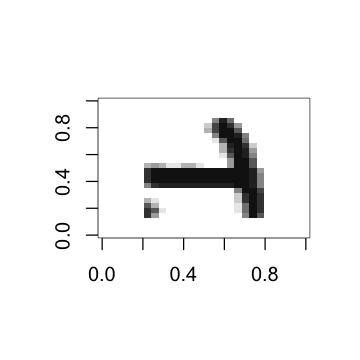

# A tibble: 1 × 2
  label probability
  <fct>       <dbl>
1 k           0.426


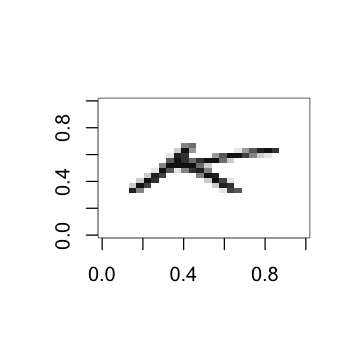

In [20]:
# check the observation marked as low probability if it is hard to recognize for algorithm
three_low_pro_letter <- filter_test_2600_prob |>
    arrange(probability) |>
    group_by(label) |>
    do(head(., n = 1)) |>
    filter(probability < 0.6) |>
    ungroup(label)

options(repr.plot.width = 3, repr.plot.height = 3)
for (i in 1:3){
    show_digit(slice(select(three_low_pro_letter, -c(probability, label)), i))
    print(slice(select(three_low_pro_letter, c(label, probability)), i))
    }

##### 6.5 Use the probability predicted by logistic regression to filter test data beased on the different level of probability, evaluate the KNN classifier again to test whether the accuracy is improved.

In [21]:
# probability tibble
pro_tib <- tibble(prob = seq(from = 0.1, to = 0.9, by = 0.1))

#test the previous KNN classifier with different testing data sets which are filtered with different level of probability
pro_test_2600_acy <- pro_tib |>
    rowwise() |>
    mutate(filtered_test = list(filter(filter_test_2600_prob, probability >= prob)),
           test_pred = list(predict(chr_wf1, filtered_test)),
           bind_pred = list(bind_cols(test_pred, filtered_test)),
           result_metric = list(metrics(data = bind_pred, truth = label,estimate = .pred_class)), 
           test_data_size = list(nrow(bind_pred))) |>
    unnest(result_metric) |>
    select(prob, test_data_size, .metric, .estimator, .estimate) |>
    filter(.metric == "accuracy")

pro_test_2600_acy

prob,test_data_size,.metric,.estimator,.estimate
<dbl>,<list>,<chr>,<chr>,<dbl>
0.1,643,accuracy,multiclass,0.7947123
0.2,634,accuracy,multiclass,0.7933754
0.3,631,accuracy,multiclass,0.7923930
0.4,628,accuracy,multiclass,0.7914013
0.5,623,accuracy,multiclass,0.7961477
0.6,621,accuracy,multiclass,0.7971014
0.7,621,accuracy,multiclass,0.7971014
0.8,614,accuracy,multiclass,0.7996743
0.9,602,accuracy,multiclass,0.8039867


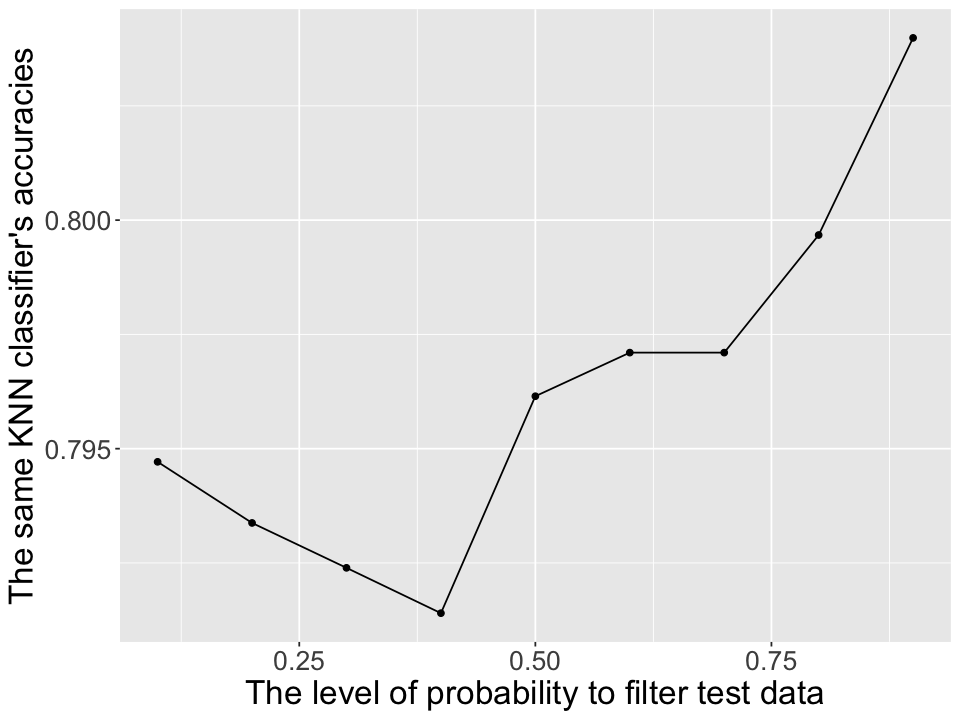

In [22]:
# visualize the level of probability of filter vs. accuracy
options(repr.plot.height = 6, repr.plot.width = 8)

pro_test_2600_acy_plot <- pro_test_2600_acy |>
    mutate(test_data_size = as.integer(test_data_size)) |>
    ggplot() +
    geom_point(aes(x = prob, y = .estimate )) +
    geom_line(aes(x = prob, y = .estimate)) +
    labs(x = "The level of probability to filter test data",
         y = "The same KNN classifier's accuracies") +
    theme(text = element_text(size = 20))

pro_test_2600_acy_plot

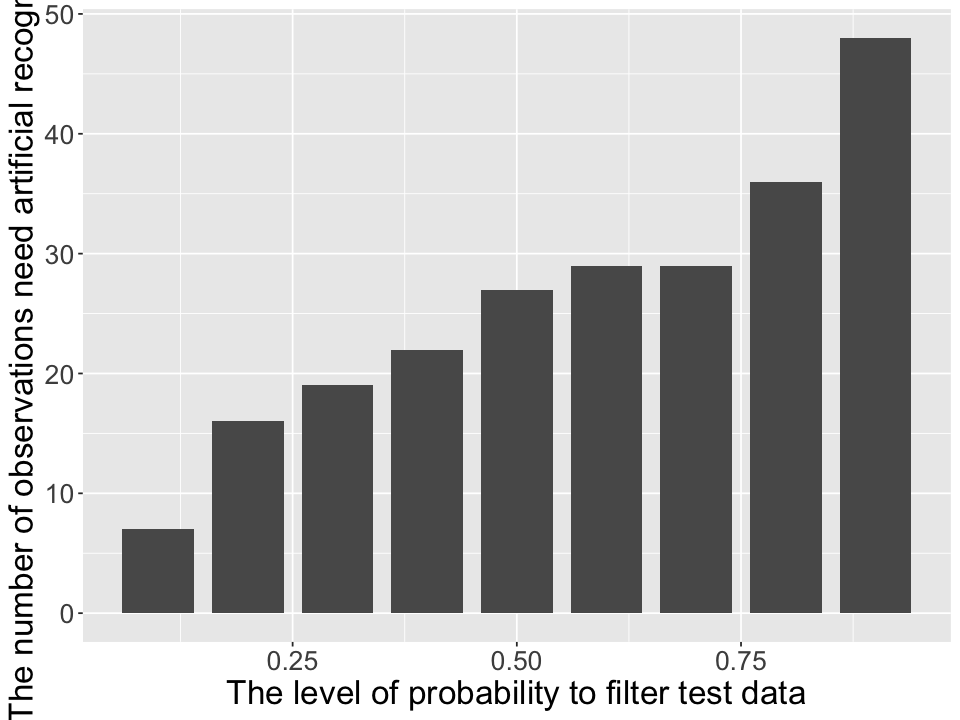

In [23]:
options(repr.plot.height = 6, repr.plot.width = 8)

pro_2600_test_size_plot <- pro_test_2600_acy |>
    mutate(test_data_size = as.integer(test_data_size)) |>
    ggplot() +
    geom_bar(aes(x = prob, y = 650 - test_data_size), stat = "identity", width = 0.08) +
    labs(x = "The level of probability to filter test data",
         y = "The number of observations need artificial recognition") +
    theme(text = element_text(size = 20))

pro_2600_test_size_plot

##### 6.6 Increase the training data set $(13000) \; \textbf{observations}$ for KNN classifier

In [24]:
# split the data of 13000 rows into training and testing data sets
set.seed(2023)

chr_initial_13000 <- initial_split(chr_data_set_13000, prop = 0.75, strata = label)
chr_train_13000 <- training(chr_initial_13000)
chr_test_13000 <- testing(chr_initial_13000)

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


In [25]:
# models
set.seed(2023)

chr_knn_best_k_13000_spec <- nearest_neighbor(weight_func = "rectangular",neighbors = best_k)|>
    set_engine("kknn")|>
    set_mode("classification")

# recipe (scaling and centering are not necessary for this data frame)
chr_recipe2 <- recipe(label~.,data = chr_train_13000)

# workflow
chr_wf_13000 <- workflow()|>
    add_recipe(chr_recipe2)|>
    add_model(chr_knn_best_k_13000_spec) |>
    fit(data = chr_train_13000)

In [26]:
# predict, evaluation
chr_knn_best_k_13000_result <- predict(chr_wf_13000,chr_test_13000)|>
    bind_cols(chr_test_13000)|>
    metrics(truth = label,estimate = .pred_class)|>
    filter(.metric=="accuracy") |>
    bind_cols(tibble(data_size = 13000, log_reg = "No")) |>
    select(data_size, log_reg, .metric, .estimator, .estimate)

chr_knn_best_k_13000_result 

data_size,log_reg,.metric,.estimator,.estimate
<dbl>,<chr>,<chr>,<chr>,<dbl>
13000,No,accuracy,multiclass,0.8833846


In [27]:
# combine the all result of models
all_result <- bind_rows(chr_knn_best_k_2600_result, chr_knn_best_k_13000_result)

all_result

data_size,log_reg,.metric,.estimator,.estimate
<dbl>,<chr>,<chr>,<chr>,<dbl>
2600,No,accuracy,multiclass,0.7907692
13000,No,accuracy,multiclass,0.8833846


In [28]:
# Predict test which is split from 2600 data set using logical regression model
filter_test_13000 <- predict(chr_lrm_26000, chr_test_13000, type = "response")

filter_test_13000_prob <- data.frame(probability = filter_test_13000) |>
                bind_cols(chr_test_13000)

head(filter_test_13000_prob)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


,probability,label,1,2,3,4,5,6,7,8,⋯,775,776,777,778,779,780,781,782,783,784
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.13401178,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0.49896601,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0.96200043,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0.13421025,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0.62555557,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0.08356199,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


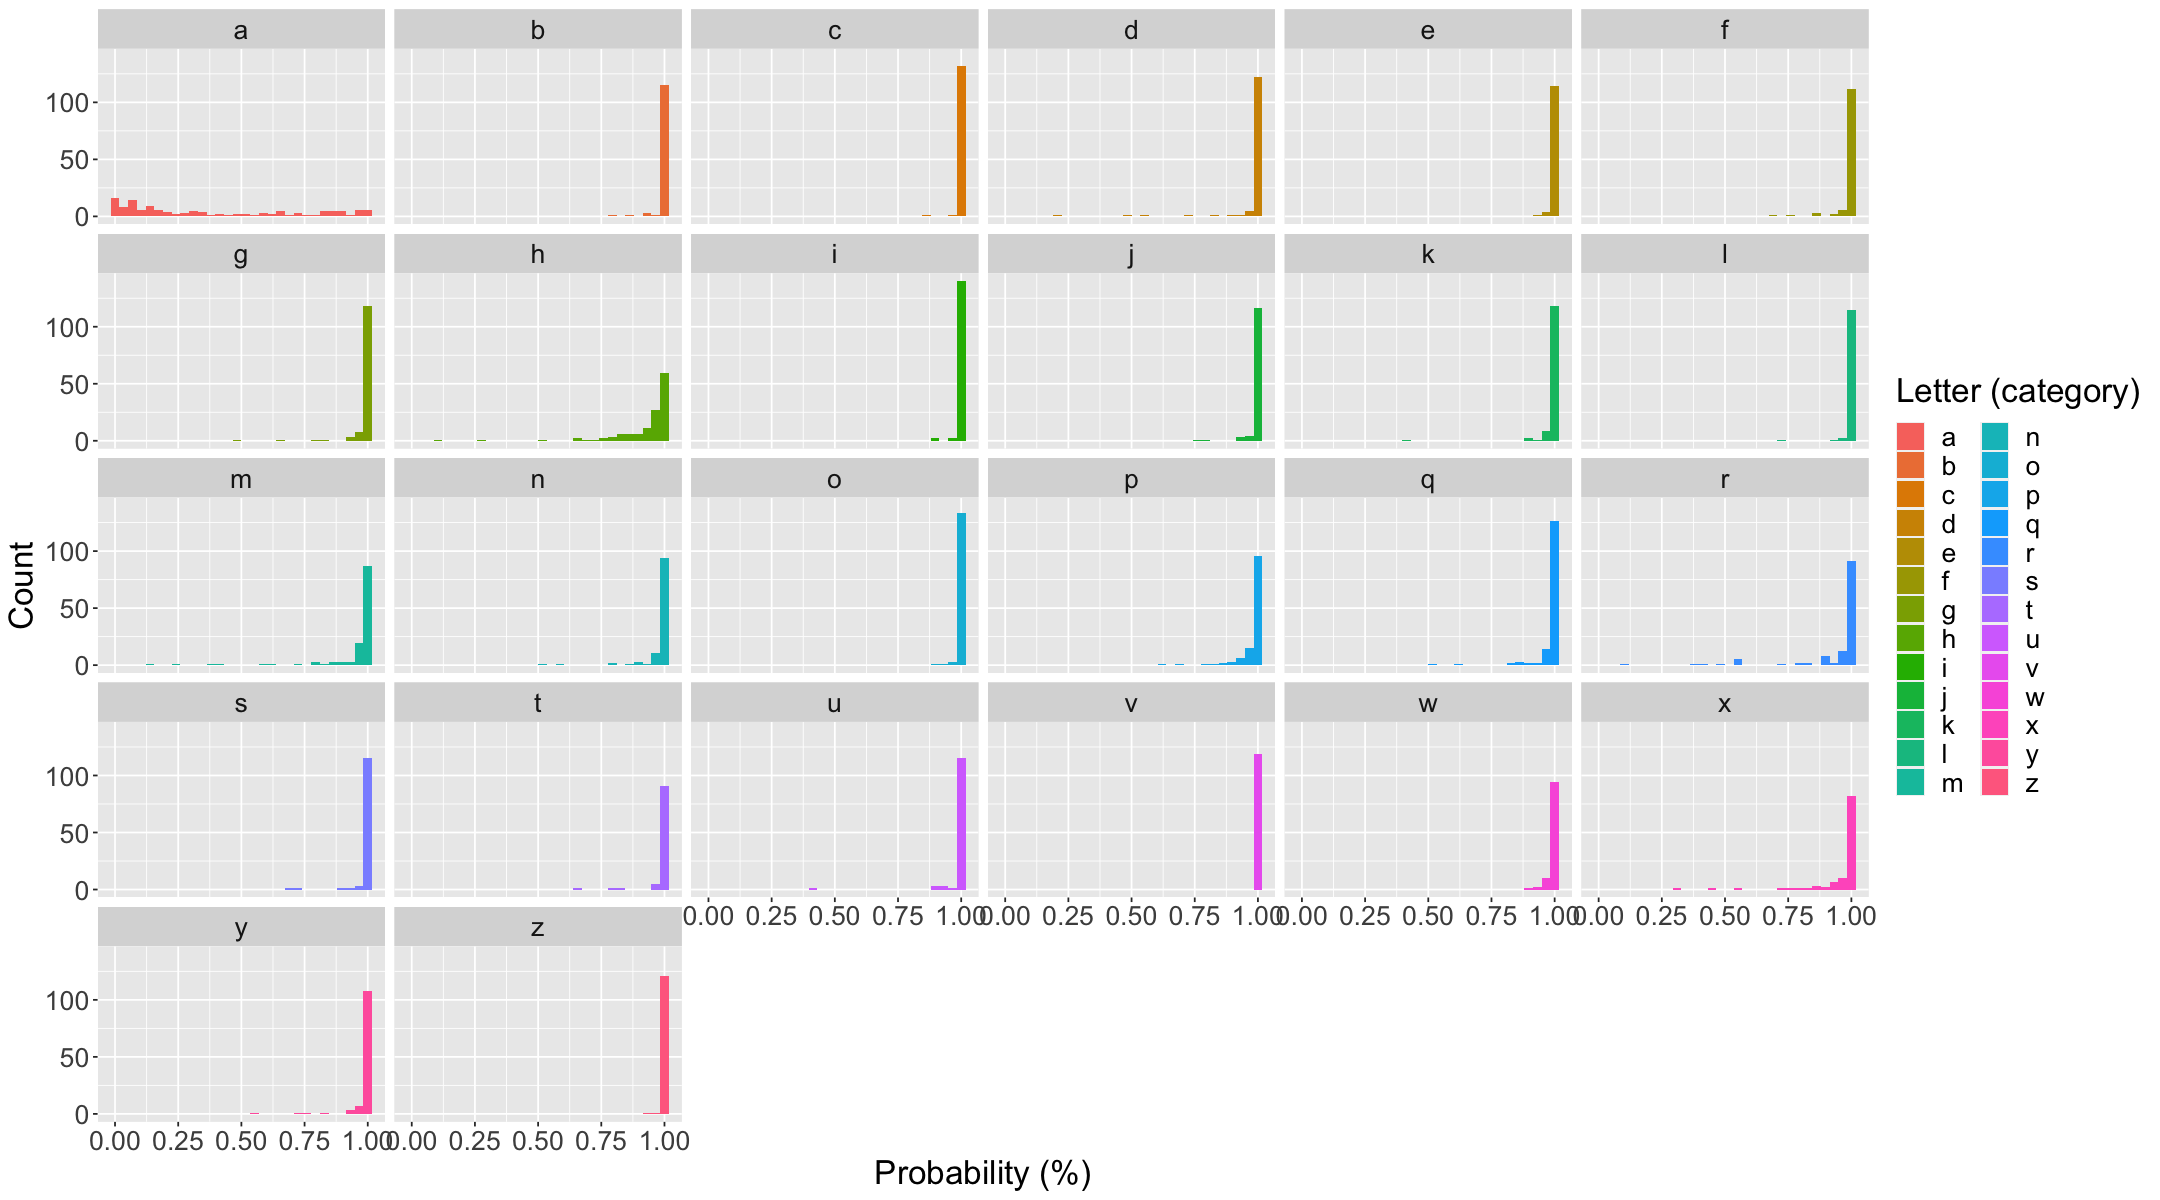

In [29]:
# visualize the count distribution of different probabilities
options(repr.plot.height = 10, repr.plot.width = 18)

filter_test_13000_prob_plot <- filter_test_13000_prob |>
    ggplot(aes(x = probability,fill = label)) +
    geom_histogram() +
    facet_wrap(~label) +
    labs(x = "Probability (%)",
         y = "Count",
         fill = "Letter (category)") +
    theme(text = element_text(size = 20))

filter_test_13000_prob_plot

In [30]:
# probability tibble
pro_tib <- tibble(prob = seq(from = 0.1, to = 0.9, by = 0.1))

#test the previous KNN classifier with different testing data sets which are filtered with different level of probability
pro_test_13000_acy <- pro_tib |>
    rowwise() |>
    mutate(filtered_test = list(filter(filter_test_13000_prob, probability >= prob)),
           test_pred = list(predict(chr_wf_13000, filtered_test)),
           bind_pred = list(bind_cols(test_pred, filtered_test)),
           result_metric = list(metrics(data = bind_pred, truth = label,estimate = .pred_class)), 
           test_data_size = list(nrow(bind_pred))) |>
    unnest(result_metric) |>
    select(prob, test_data_size, .metric, .estimator, .estimate) |>
    filter(.metric == "accuracy")

pro_test_13000_acy

prob,test_data_size,.metric,.estimator,.estimate
<dbl>,<list>,<chr>,<chr>,<dbl>
0.1,3208,accuracy,multiclass,0.8824813
0.2,3186,accuracy,multiclass,0.8822976
0.3,3176,accuracy,multiclass,0.8825567
0.4,3163,accuracy,multiclass,0.8823901
0.5,3150,accuracy,multiclass,0.8831746
0.6,3132,accuracy,multiclass,0.8837803
0.7,3114,accuracy,multiclass,0.8834297
0.8,3084,accuracy,multiclass,0.8861868
0.9,3009,accuracy,multiclass,0.8880027


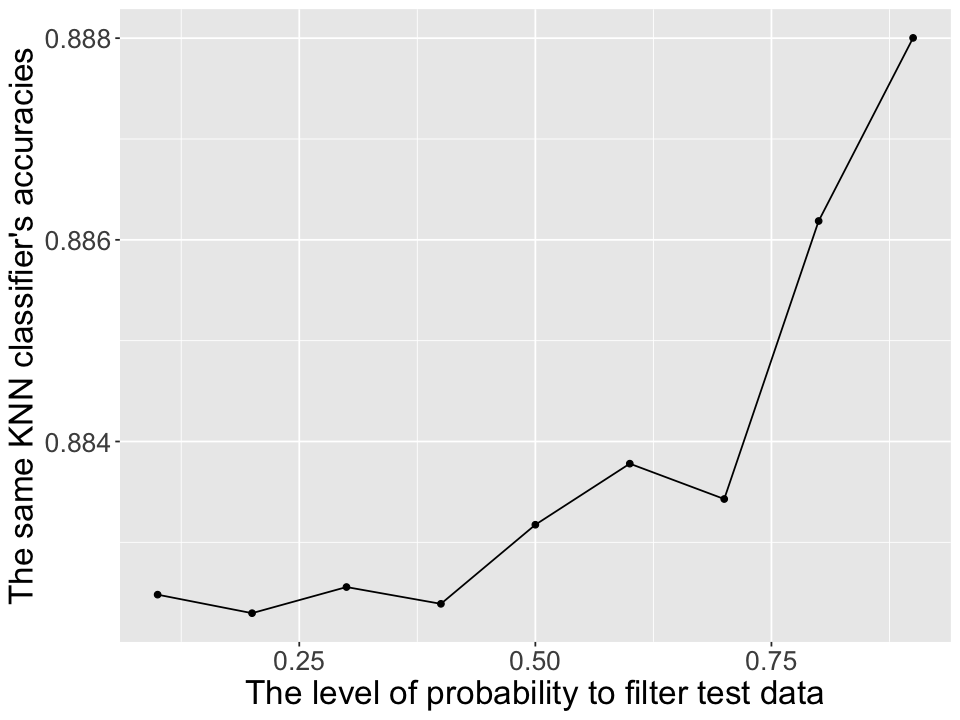

In [31]:
# visualize the level of probability of filter vs. accuracy
options(repr.plot.height = 6, repr.plot.width = 8)

pro_test_13000_acy_plot <- pro_test_13000_acy |>
    mutate(test_data_size = as.integer(test_data_size)) |>
    ggplot() +
    geom_point(aes(x = prob, y = .estimate )) +
    geom_line(aes(x = prob, y = .estimate)) +
    labs(x = "The level of probability to filter test data",
         y = "The same KNN classifier's accuracies") +
    theme(text = element_text(size = 20))

pro_test_13000_acy_plot

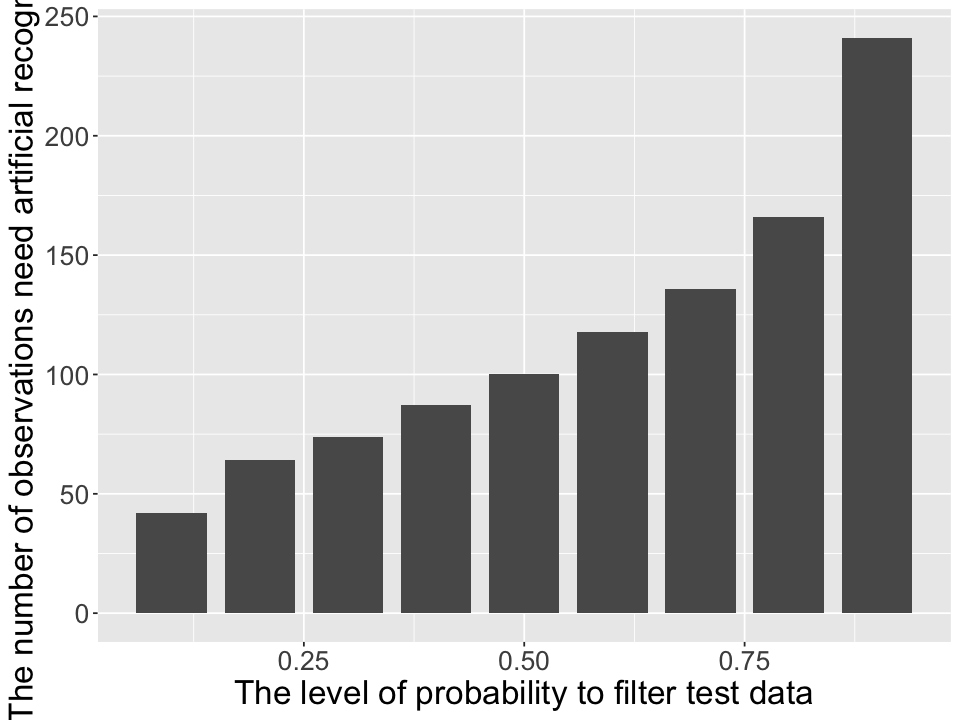

In [32]:
options(repr.plot.height = 6, repr.plot.width = 8)

pro_13000_test_size_plot <- pro_test_13000_acy |>
    mutate(test_data_size = as.integer(test_data_size)) |>
    ggplot() +
    geom_bar(aes(x = prob, y = 3250 - test_data_size), stat = "identity", width = 0.08) +
    labs(x = "The level of probability to filter test data",
         y = "The number of observations need artificial recognition") +
    theme(text = element_text(size = 20))

pro_13000_test_size_plot

##### 6.7 Use the entire data set  $(26000) \; \textbf{observations}$  KNN classifier

In [33]:
# split the data of 26000 rows into training and testing data sets
set.seed(2023)

chr_initial_26000 <- initial_split(chr_tidy_data, prop = 0.75, strata = label)
chr_train_26000 <- training(chr_initial_26000)
chr_test_26000 <- testing(chr_initial_26000)

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


In [34]:
# models
set.seed(2023)

chr_knn_best_k_26000_spec <- nearest_neighbor(weight_func = "rectangular",neighbors = best_k)|>
    set_engine("kknn")|>
    set_mode("classification")

# recipe (scaling and centering are not necessary for this data frame)
chr_recipe3 <- recipe(label~.,data = chr_train_26000)

# workflow
chr_wf_26000 <- workflow()|>
    add_recipe(chr_recipe3)|>
    add_model(chr_knn_best_k_26000_spec) |>
    fit(data = chr_train_26000)

In [35]:
# predict, evaluation
chr_knn_best_k_26000_result <- predict(chr_wf_26000,chr_test_26000)|>
    bind_cols(chr_test_26000)|>
    metrics(truth = label,estimate = .pred_class)|>
    filter(.metric=="accuracy") |>
    bind_cols(tibble(data_size = 26000, log_reg = "No")) |>
    select(data_size, log_reg, .metric, .estimator, .estimate)

chr_knn_best_k_26000_result 

data_size,log_reg,.metric,.estimator,.estimate
<dbl>,<chr>,<chr>,<chr>,<dbl>
26000,No,accuracy,multiclass,0.9081538


In [36]:
# combine the all result of models
all_result <- bind_rows(all_result, chr_knn_best_k_26000_result)

all_result

data_size,log_reg,.metric,.estimator,.estimate
<dbl>,<chr>,<chr>,<chr>,<dbl>
2600,No,accuracy,multiclass,0.7907692
13000,No,accuracy,multiclass,0.8833846
26000,No,accuracy,multiclass,0.9081538


In [37]:
# Predict test which is split from 2600 data set using logical regression model
filter_test_26000 <- predict(chr_lrm_26000, chr_test_26000, type = "response")

filter_test_26000_prob <- data.frame(probability = filter_test_26000) |>
                bind_cols(chr_test_26000)

head(filter_test_26000_prob)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


,probability,label,1,2,3,4,5,6,7,8,⋯,775,776,777,778,779,780,781,782,783,784
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2284917,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0.3267001,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0.1937077,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0.9620004,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0.1342102,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0.3040445,a,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


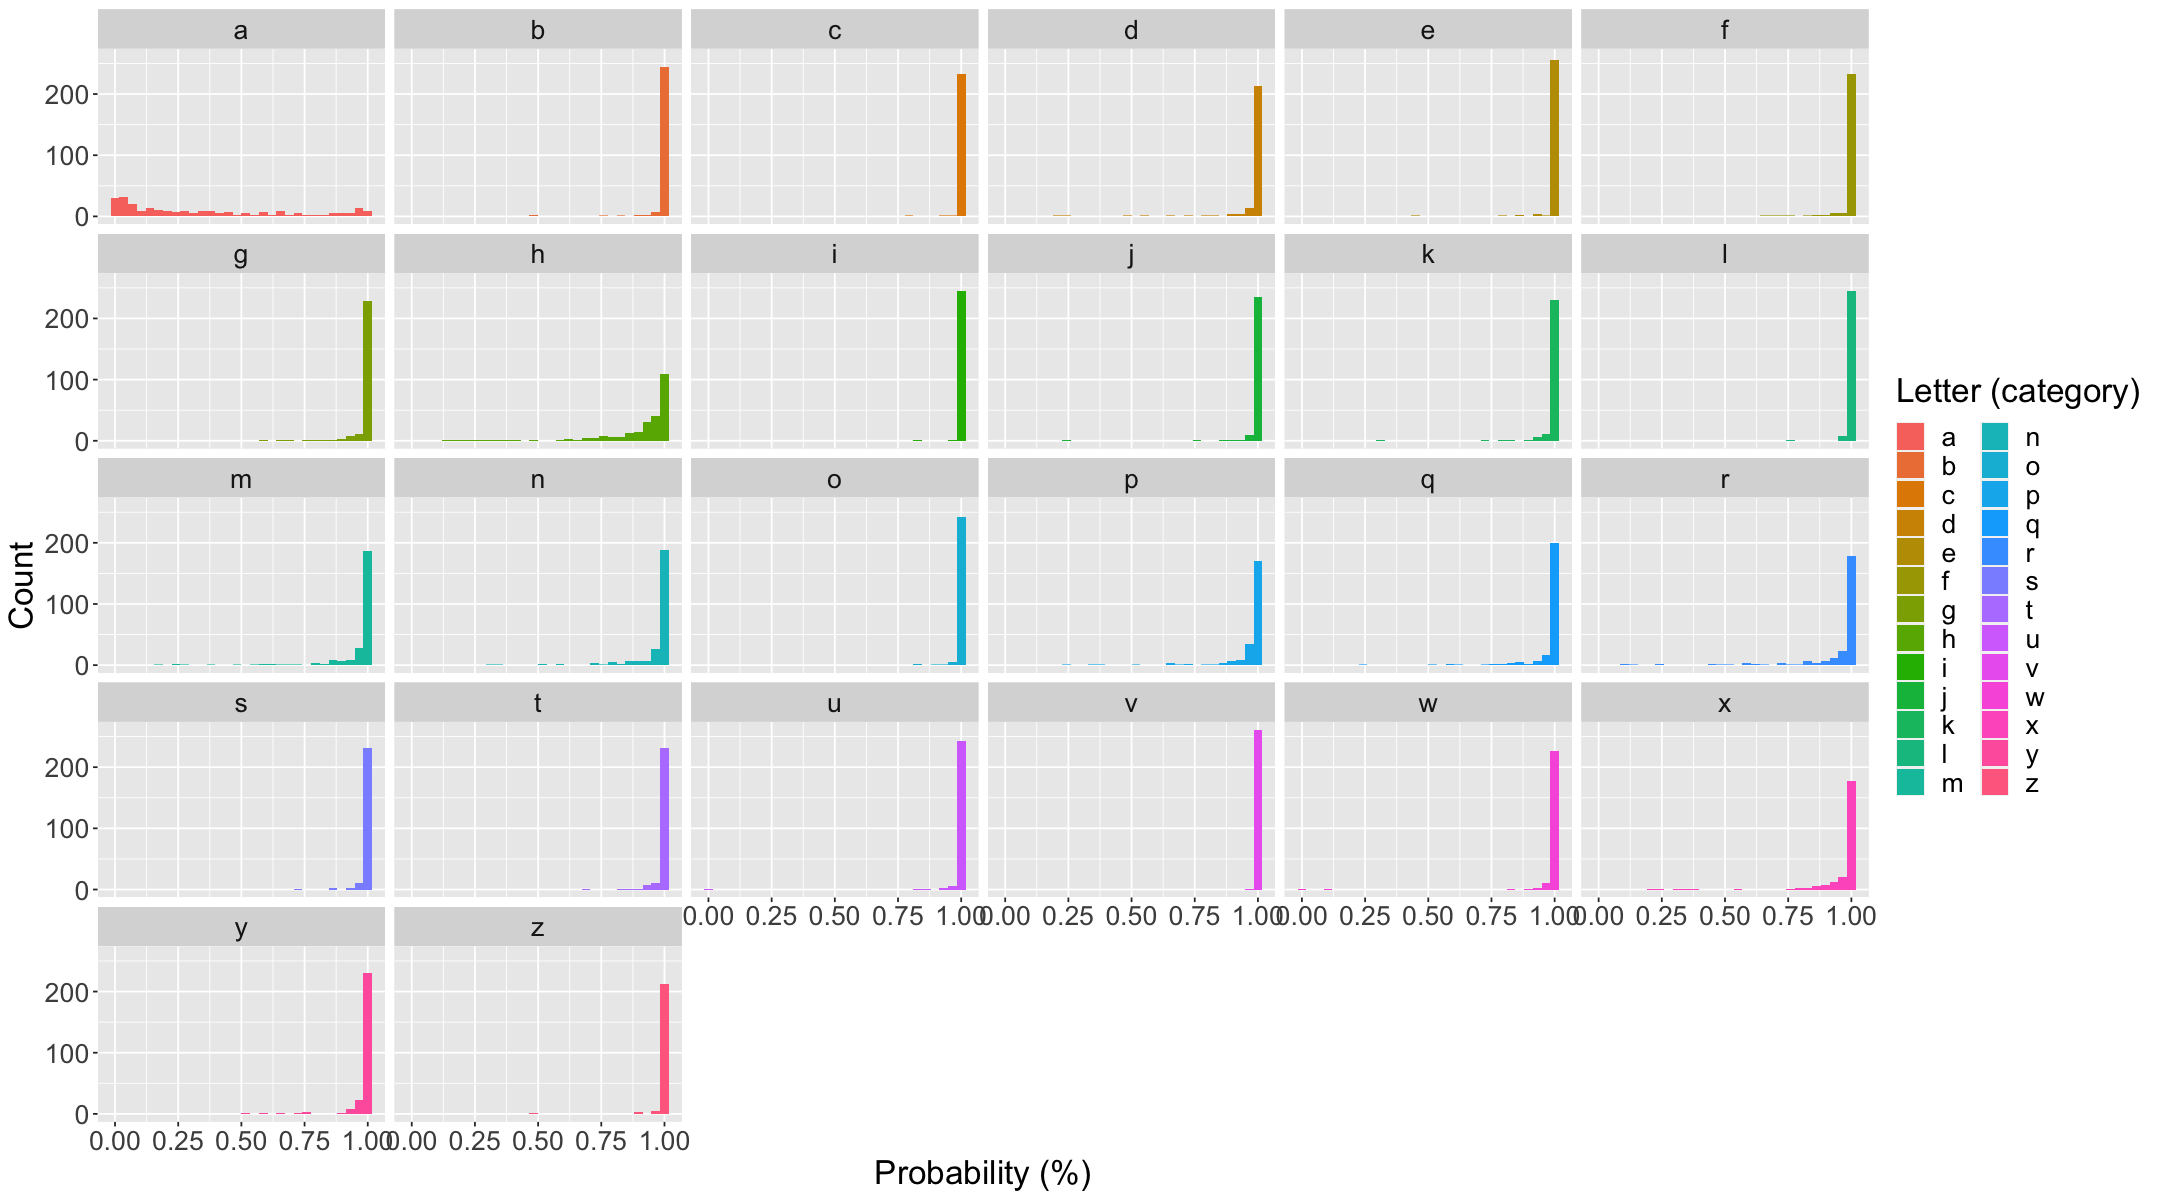

In [38]:
# visualize the count distribution of different probabilities
options(repr.plot.height = 10, repr.plot.width = 18)

filter_test_26000_prob_plot <- filter_test_26000_prob |>
    ggplot(aes(x = probability,fill = label)) +
    geom_histogram() +
    facet_wrap(~label) +
    labs(x = "Probability (%)",
         y = "Count",
         fill = "Letter (category)") +
    theme(text = element_text(size = 20))

filter_test_26000_prob_plot

In [39]:
# probability tibble
pro_tib <- tibble(prob = seq(from = 0.1, to = 0.9, by = 0.1))

#test the previous KNN classifier with different testing data sets which are filtered with different level of probability
pro_test_26000_acy <- pro_tib |>
    rowwise() |>
    mutate(filtered_test = list(filter(filter_test_26000_prob, probability >= prob)),
           test_pred = list(predict(chr_wf_26000, filtered_test)),
           bind_pred = list(bind_cols(test_pred, filtered_test)),
           result_metric = list(metrics(data = bind_pred, truth = label,estimate = .pred_class)), 
           test_data_size = list(nrow(bind_pred))) |>
    unnest(result_metric) |>
    select(prob, test_data_size, .metric, .estimator, .estimate) |>
    filter(.metric == "accuracy")

pro_test_26000_acy

prob,test_data_size,.metric,.estimator,.estimate
<dbl>,<list>,<chr>,<chr>,<dbl>
0.1,6412,accuracy,multiclass,0.9075172
0.2,6370,accuracy,multiclass,0.9073783
0.3,6335,accuracy,multiclass,0.9076559
0.4,6300,accuracy,multiclass,0.9076190
0.5,6275,accuracy,multiclass,0.9082072
0.6,6239,accuracy,multiclass,0.9086392
0.7,6197,accuracy,multiclass,0.9085041
0.8,6130,accuracy,multiclass,0.9091354
0.9,5983,accuracy,multiclass,0.9100786


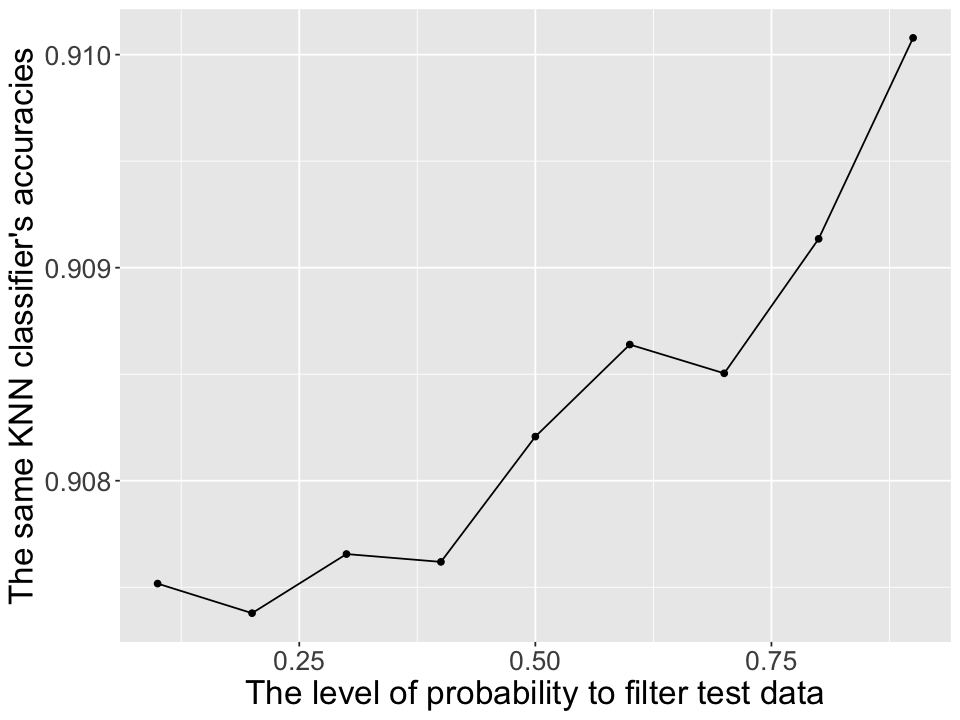

In [40]:
# visualize the level of probability of filter vs. accuracy
options(repr.plot.height = 6, repr.plot.width = 8)

pro_test_26000_acy_plot <- pro_test_26000_acy |>
    mutate(test_data_size = as.integer(test_data_size)) |>
    ggplot() +
    geom_point(aes(x = prob, y = .estimate )) +
    geom_line(aes(x = prob, y = .estimate)) +
    labs(x = "The level of probability to filter test data",
         y = "The same KNN classifier's accuracies") +
    theme(text = element_text(size = 20))

pro_test_26000_acy_plot

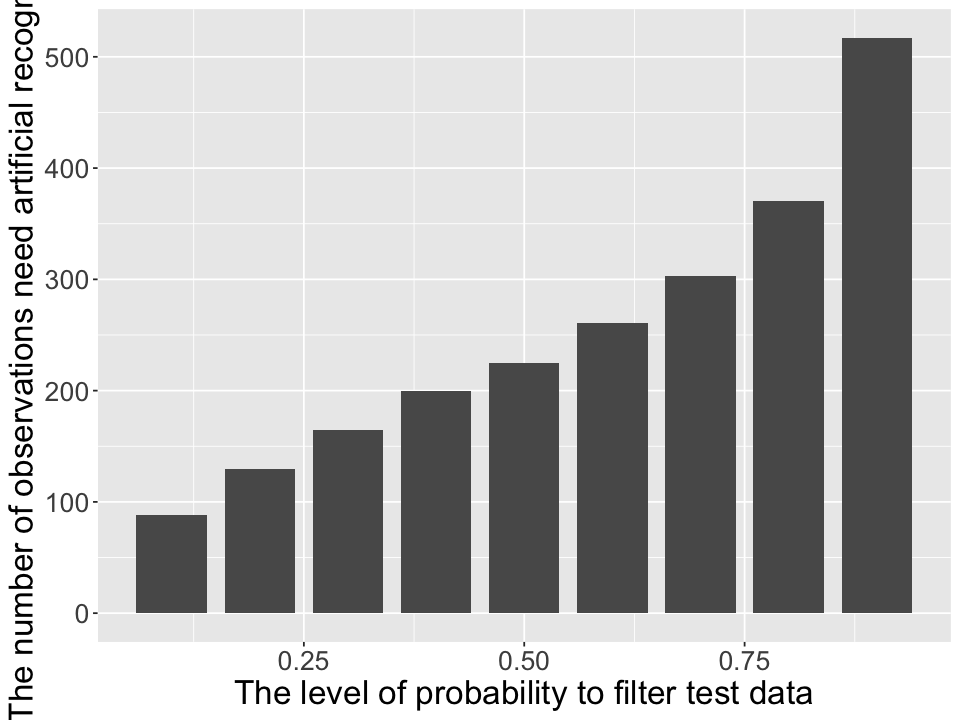

In [41]:
options(repr.plot.height = 6, repr.plot.width = 8)

pro_26000_test_size_plot <- pro_test_26000_acy |>
    mutate(test_data_size = as.integer(test_data_size)) |>
    ggplot() +
    geom_bar(aes(x = prob, y = 6500 - test_data_size), stat = "identity", width = 0.08) +
    labs(x = "The level of probability to filter test data",
         y = "The number of observations need artificial recognition") +
    theme(text = element_text(size = 20))

pro_26000_test_size_plot

#### 7. result and visualization

In [42]:
all_result

data_size,log_reg,.metric,.estimator,.estimate
<dbl>,<chr>,<chr>,<chr>,<dbl>
2600,No,accuracy,multiclass,0.7907692
13000,No,accuracy,multiclass,0.8833846
26000,No,accuracy,multiclass,0.9081538


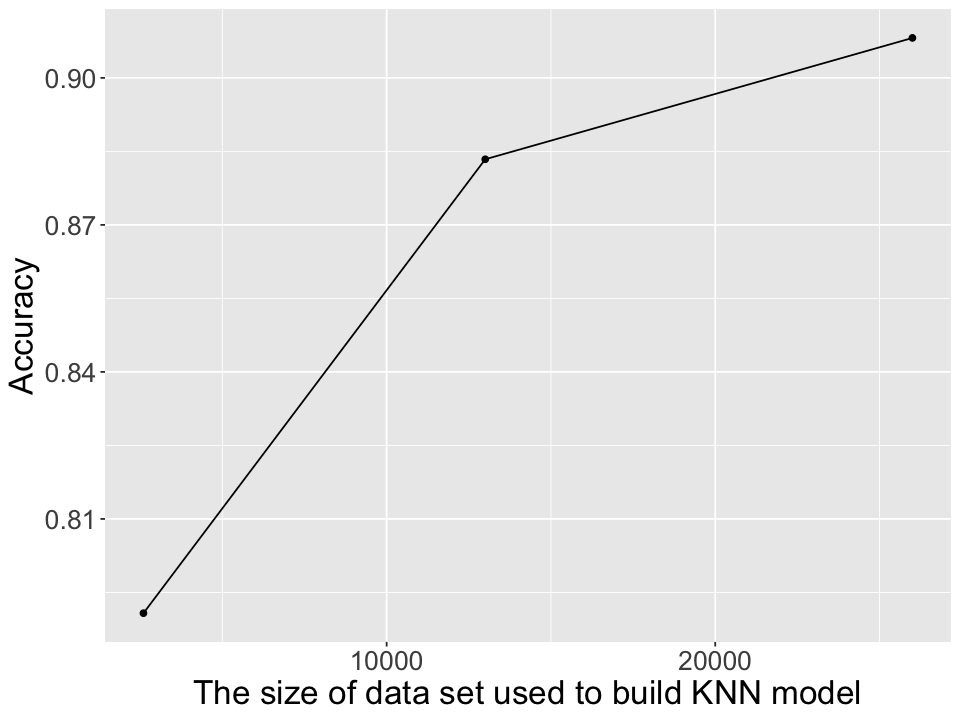

In [43]:
options(repr.plot.height = 6, repr.plot.width = 8)

all_result_plot <- all_result |>
    ggplot(aes(x = data_size, y = .estimate)) +
    geom_point() +
    geom_line() +
    labs(x = "The size of data set used to build KNN model",
         y = "Accuracy") +
    theme(text = element_text(size = 20))

all_result_plot

In [44]:
all_result_lrm <- bind_rows(bind_cols(pro_test_2600_acy, tibble(data_size = rep(2600, each = 9))),
                            bind_cols(pro_test_13000_acy, tibble(data_size = rep(13000, each = 9))),
                            bind_cols(pro_test_26000_acy, tibble(data_size = rep(26000, each = 9)))) |>
    mutate(data_size = factor(data_size)) |>
    select(data_size, prob, test_data_size, .metric, .estimator, .estimate)

head(all_result_lrm)

data_size,prob,test_data_size,.metric,.estimator,.estimate
<fct>,<dbl>,<list>,<chr>,<chr>,<dbl>
2600,0.1,643,accuracy,multiclass,0.7947123
2600,0.2,634,accuracy,multiclass,0.7933754
2600,0.3,631,accuracy,multiclass,0.7923930
2600,0.4,628,accuracy,multiclass,0.7914013
2600,0.5,623,accuracy,multiclass,0.7961477
2600,0.6,621,accuracy,multiclass,0.7971014


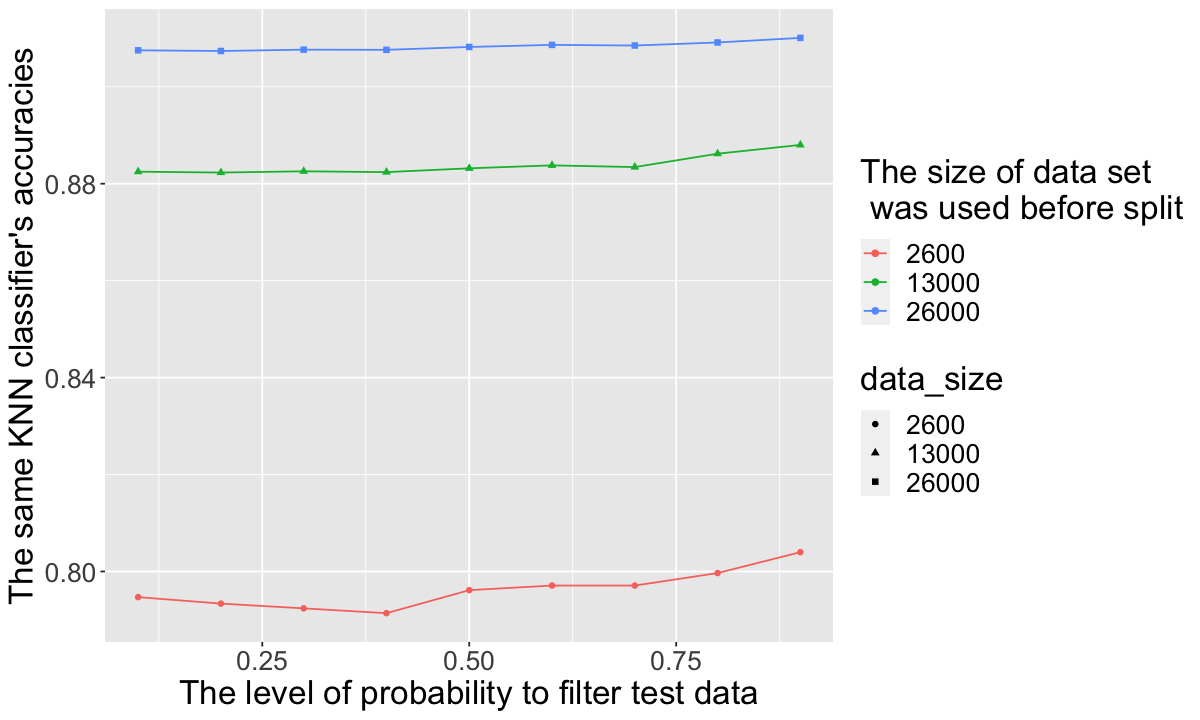

In [45]:
options(repr.plot.height = 6, repr.plot.width = 10)

all_result_lrm_plot <- all_result_lrm |>
    ggplot(aes(x = prob, y = .estimate, color = data_size, shape = data_size)) +
    geom_line() +
    geom_point() +
    labs(x = "The level of probability to filter test data",
         y = "The same KNN classifier's accuracies", 
         color = "The size of data set \n was used before split") +
    theme(text = element_text(size = 20))

all_result_lrm_plot